In [106]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import math
%matplotlib inline

name = 'Road_Traffic_Fine_Management_Process'
test_df = pd.read_pickle(name + 'predicted.dat')
train_df = pd.read_pickle(name + 'extra-columns.dat')

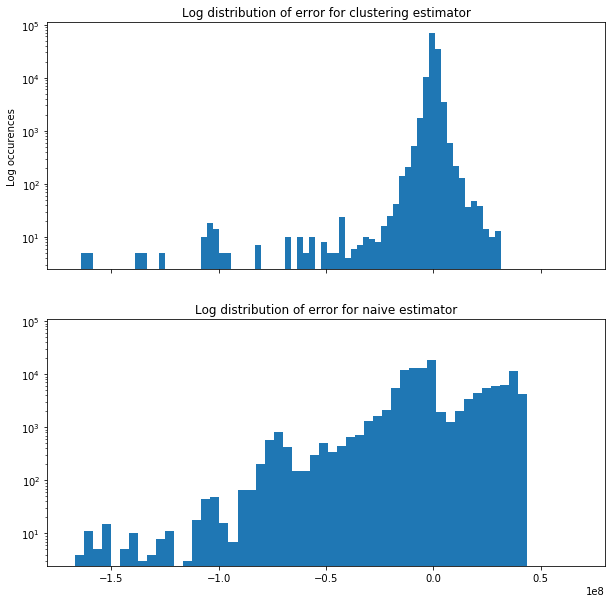

In [60]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=[10,10])
ax[0].hist((test_df['estimator2'] - test_df['time-to-end']), bins=100)
ax[1].hist((test_df['estimator'] - test_df['time-to-end']), bins=100)
ax[0].set_xlim([-180000000,80000000])
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_ylabel('Log occurences')
ax[0].set_title('Log distribution of error for clustering estimator')
ax[1].set_title('Log distribution of error for naive estimator')
plt.savefig('error_dist.png')

In [55]:
test_df['event time:timestamp'] = test_df['event time:timestamp'].apply(lambda a : a.day)/365+test_df['event time:timestamp'].apply(lambda a : a.year)+test_df['event time:timestamp'].apply(lambda a : a.month)/12

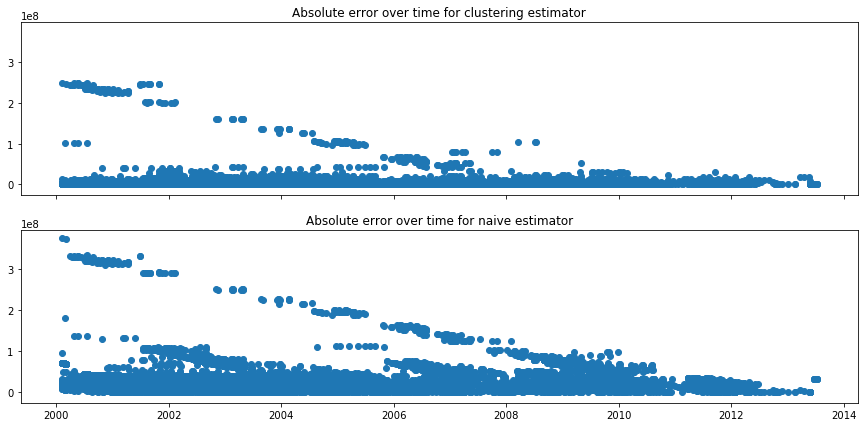

In [64]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=[15,7])
ax[1].scatter(test_df['event time:timestamp'] , abs(test_df['estimator']-test_df['time-to-end']))
ax[0].scatter(test_df['event time:timestamp'] , abs(test_df['estimator2']-test_df['time-to-end']))
ax[0].set_title('Absolute error over time for clustering estimator')
ax[1].set_title('Absolute error over time for naive estimator')
plt.savefig('error_time.png')

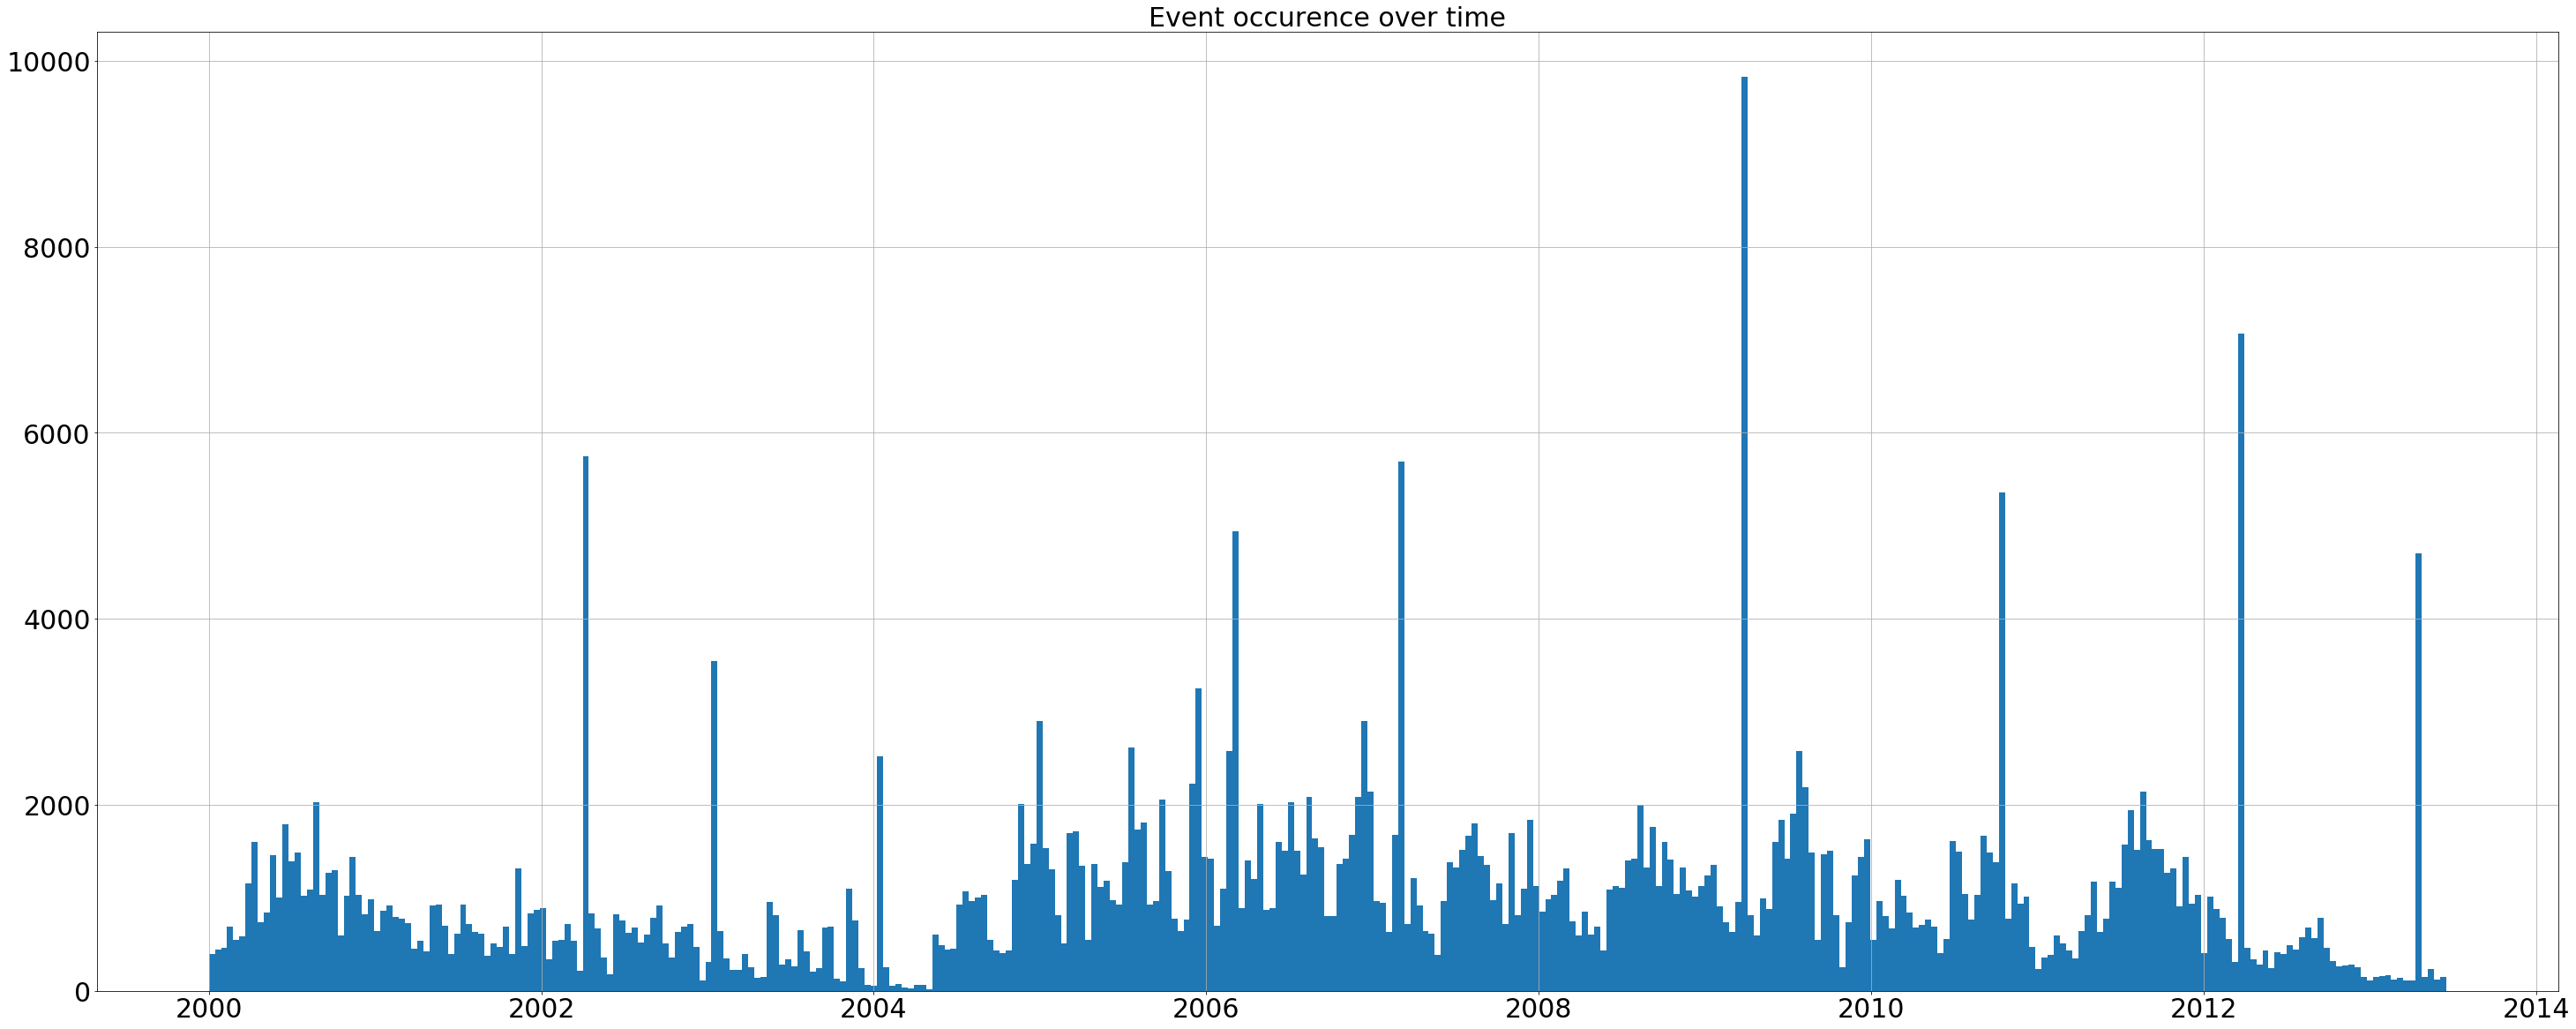

In [72]:
train_df["event time:timestamp"].hist(bins=365, figsize=[50,20], xlabelsize=30, ylabelsize=30)
plt.title('Event occurence over time', size=30)
plt.savefig('events_time.png')

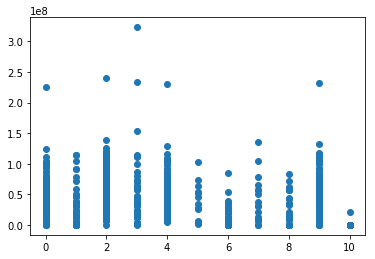

In [96]:
dat = pd.DataFrame(test_df.groupby(['cluster', 'event concept:name'])['time-to-end'].mean())
dat.index = dat.index.droplevel(0)
plt.scatter(dat.index, dat['time-to-end'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'case concept:name' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'case concept:name' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


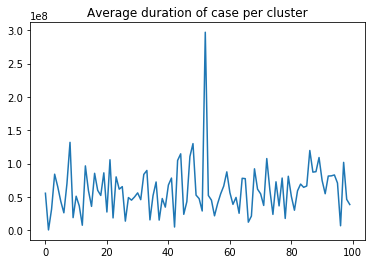

In [150]:
train_means = pd.DataFrame(train_df.groupby('case concept:name')['time-to-end'].max())
train_means['cluster'] = train_df.groupby('case concept:name')['cluster'].head(1)
plt.plot(train_means.sort_values('time-to-end').groupby('cluster').mean().index, train_means.sort_values('time-to-end').groupby('cluster').mean()['time-to-end'])
plt.title("Average duration of case per cluster")

In [149]:
train_means.sort_values('time-to-end').groupby('cluster').mean()

,time-to-end
cluster,
0,5.552063e+07
1,5.238859e+05
2,3.160370e+07
3,8.408673e+07
4,6.542302e+07
5,4.333890e+07
6,2.620300e+07
7,6.980011e+07
8,1.318576e+08
